# Case Study: Broadband Speed experiences of Delhi-NCR's Internet Users

## Background

<p align="center">
India has over 1,98 crore fixed-line broadband subscribers, according to the latest data provided by the Indian Telecom Regulatory Authority (TRAI). Amid the surge in demand for the high-speed internet in wake of the shift to work from home due to the coronavirus outbreak, the government is considering a reduction in the license fee for fixed-line broadband services in the country.
</p>
<p align="center">
As an individual,  you must ensure that you have sufficient speed to not disrupt daily use, even when demand is at its highest. Some customers get lucky and have access to fiber connections of over 1000 Megabits (Mbps) per second while some rural businesses are stuck on 3 to 6Mbps DSL connections. With a growing number of ISPs offering “upto” 50mbps at affordable prices, how do you choose between them ? Just because the speed is advertised, doesn’t mean that’s the speed you’ll be receiving. 
</p>

# Data Source

Data for this study has been collected using internet speed test tools - speedtest.net, fast.com , M-Labs and cyberspeed. 122 responders were requested to register their measurement 2-3 times a day when they are closer to their wifi router. It was also ensured that no other devices were consuming a major portion of bandwidth when the measurement was taken.

# Data Preparation

The raw data was exported from MySQL database into a CSV file before loading into the R software. Since the dataset is not very large, it was convenient to identify NULL values using SQL and delete those rows there and then so it's readily available for statistical analysis.  

# Load Dependencies

In [272]:
library(rpivotTable)
library(dplyr)
library(skimr)
library(car)

# Load Data

In [313]:
data = read.csv('isp.csv', header=TRUE)
attach(data)

# Data Structure

In [274]:
str(data)

'data.frame':	237 obs. of  13 variables:
 $ X                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ip                 : Factor w/ 122 levels "103.147.151.67",..: 70 70 70 6 50 6 72 70 39 70 ...
 $ dl                 : num  49.8 42.5 44.5 25.7 33 ...
 $ ul                 : num  9.64 9.45 9.08 40.65 10.65 ...
 $ ping               : num  53 55 49.4 36.6 49.6 ...
 $ jitter             : num  20.19 25.19 0.69 6.06 186.53 ...
 $ rawIspInfo.city    : Factor w/ 13 levels "Bengaluru","Delhi",..: 4 4 4 2 4 2 2 4 2 4 ...
 $ rawIspInfo.region  : Factor w/ 8 levels "Delhi","Haryana",..: 2 2 2 1 2 1 1 2 1 2 ...
 $ rawIspInfo.loc     : Factor w/ 16 levels "12.9719,77.5937",..: 8 8 8 13 8 13 10 8 13 8 ...
 $ rawIspInfo.postal  : Factor w/ 15 levels "110001","110006",..: 5 5 5 1 5 1 3 5 1 5 ...
 $ rawIspInfo.hostname: Factor w/ 31 levels "42-111-10-152.live.vodafone.in",..: NA NA NA NA 4 NA NA NA NA NA ...
 $ hour               : int  10 10 10 10 10 10 10 10 11 11 ...
 $ org                : Factor w/

### Key Observations:

- 237 observations were collected from 122 unique IP addresses at different hours of day.
- There are 13 cities, 8 regions, 16  locations and 15 postal codes in the dataset.
- The data consist of measuresments of download speed, upload speed and ping& jitter values obtained at the time 
  of measurement
- Detailed description of each variable is provided in table following this section.

![title](databaseoverview.png)

# Exploratory Data Analysis - First glance of the data

In [344]:
head(data)

,X,ip,dl,ul,ping,jitter,rawIspInfo.city,rawIspInfo.region,rawIspInfo.loc,rawIspInfo.postal,rawIspInfo.hostname,hour,org
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,1,171.50.152.185,49.76,9.64,53.0,20.19,Gurgaon,Haryana,"28.4601,77.0263",122004,NA,10,Airtel
2,2,171.50.152.185,42.45,9.45,55.0,25.19,Gurgaon,Haryana,"28.4601,77.0263",122004,NA,10,Airtel
3,3,171.50.152.185,44.48,9.08,49.4,0.69,Gurgaon,Haryana,"28.4601,77.0263",122004,NA,10,Airtel
4,4,103.214.61.58,25.69,40.65,36.6,6.06,Delhi,Delhi,"28.6519,77.2315",110001,NA,10,Excitel
5,5,122.162.79.5,32.98,10.65,49.6,186.53,Gurgaon,Haryana,"28.4601,77.0263",122004,abts-north-dynamic-005.79.162.122.airtelbroadband.in,10,Airtel
6,6,103.214.61.58,23.54,33.47,40.7,1.94,Delhi,Delhi,"28.6519,77.2315",110001,NA,10,Excitel


# Summary Statistics

In [345]:
summary(data)

       X                     ip            dl               ul        
 Min.   :  1   171.50.152.185 : 25   Min.   :  0.48   Min.   :  0.00  
 1st Qu.: 60   103.214.61.58  : 13   1st Qu.: 15.69   1st Qu.:  5.77  
 Median :119   103.211.16.33  :  7   Median : 33.47   Median : 11.98  
 Mean   :119   122.162.102.255:  6   Mean   : 49.82   Mean   : 32.04  
 3rd Qu.:178   183.83.215.40  :  5   3rd Qu.: 63.22   3rd Qu.: 53.09  
 Max.   :237   203.212.226.146:  5   Max.   :304.23   Max.   :170.56  
               (Other)        :176                                    
      ping            jitter        rawIspInfo.city     rawIspInfo.region
 Min.   :  5.00   Min.   :  0.18   Delhi    :158    Delhi        :168    
 1st Qu.: 40.60   1st Qu.:  1.62   Gurgaon  : 43    Haryana      : 47    
 Median : 47.06   Median :  5.63   New Delhi: 10    Telangana    :  9    
 Mean   : 55.43   Mean   : 40.93   Hyderabad:  9    Rajasthan    :  5    
 3rd Qu.: 53.43   3rd Qu.: 26.77   Jaipur   :  5    Uttar Prad

### Key observations:
- Mean download speed of the sample is 49.82 Mbps and average upload speed is 32.04
- Mean and Median are not close to each other which indicated data is not normally distributed.
- Majority of observations were taken in Delhi-NCR.
- Sample size of Den, Hathway and Jio responders is very small (<=30) 

# Data Summary (Grouped by Internet Service Provider)

In [277]:
by(data, INDICES=org, FUN=summary)

org: Airtel
       X                        ip           dl               ul         
 Min.   :  1.00   171.50.152.185 :25   Min.   :  0.67   Min.   :  0.000  
 1st Qu.: 39.75   122.162.102.255: 6   1st Qu.: 13.88   1st Qu.:  3.430  
 Median :115.50   27.56.166.174  : 4   Median : 29.48   Median :  8.875  
 Mean   :107.49   117.99.190.74  : 3   Mean   : 31.75   Mean   : 14.528  
 3rd Qu.:154.75   122.162.83.67  : 3   3rd Qu.: 42.27   3rd Qu.:  9.745  
 Max.   :235.00   182.64.212.11  : 3   Max.   :125.17   Max.   :138.850  
                  (Other)        :42                                     
      ping            jitter        rawIspInfo.city     rawIspInfo.region
 Min.   : 45.30   Min.   :  0.27   Gurgaon  :42     Haryana      :45     
 1st Qu.: 49.25   1st Qu.:  1.82   Delhi    :38     Delhi        :38     
 Median : 52.15   Median :  6.89   Faridabad: 3     Uttar Pradesh: 3     
 Mean   : 63.63   Mean   : 30.31   Meerut   : 2     Karnataka    : 0     
 3rd Qu.: 57.27   3rd Qu.:

# Key Observations

Following tables depict the 5 number summary of download and upload speeds.


![title](5_number_summary_dl.png)
![title](5_number_summary_upload.png)



##### Important Note

It is important to note that this summary statistics depict the observed download and upload speeds by responders. It may or may not represent the actual performance delivered by respective internet service providers. However for the sake of this analysis, it will be assumed that these numbers alteast represent how the performance is percieved by responders.

## Visual Insights

### Download Speed 

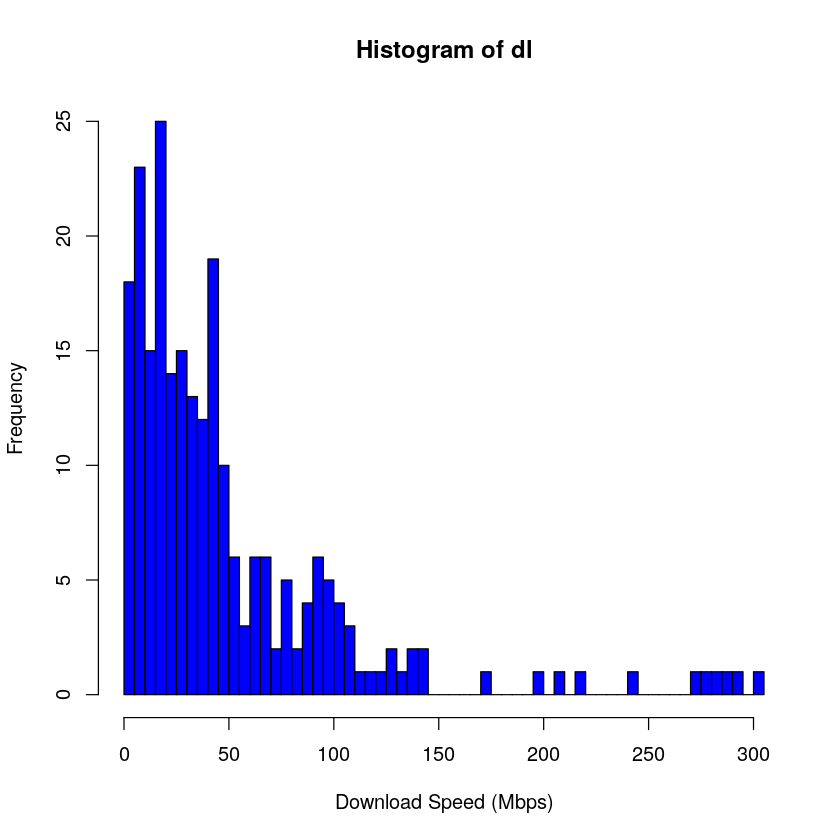

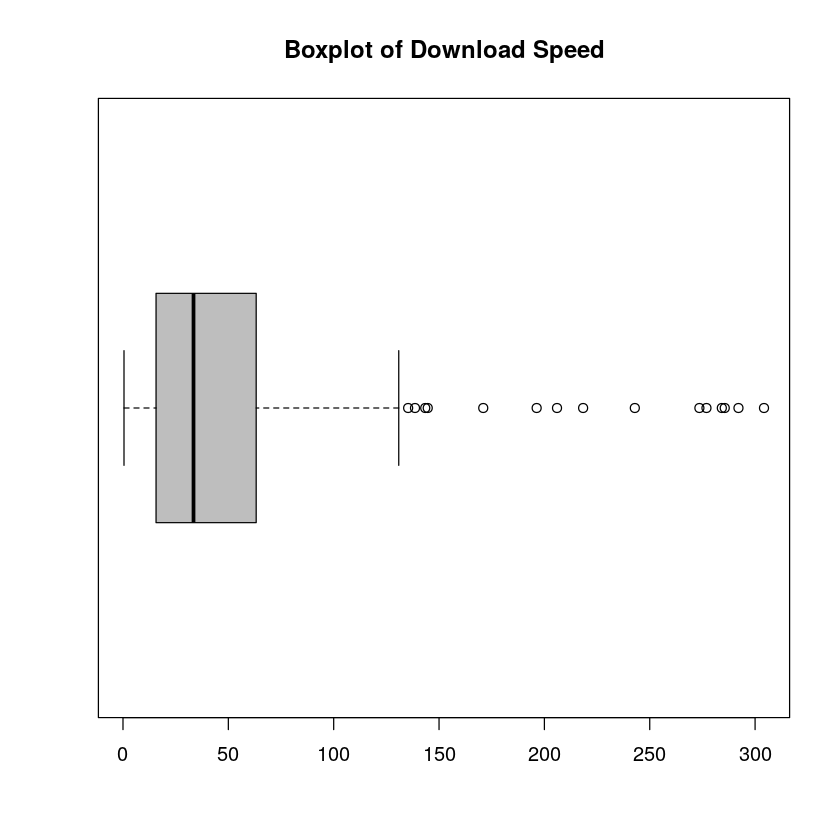

In [278]:
hist(dl, col="blue",breaks = 100, xlab = "Download Speed (Mbps)")
boxplot(dl, horizontal = TRUE, col="grey", main="Boxplot of Download Speed")

### Key Obseravtions

- The median download speed of the observed sample is 33.47 (IQR=15.69-63.22) Mbps.
- The distribution is skewed towards left.
- Only a very small fraction of reponders in the sample have access to comparatively higher bandwidth connection (Fibre)

## Upload Speed

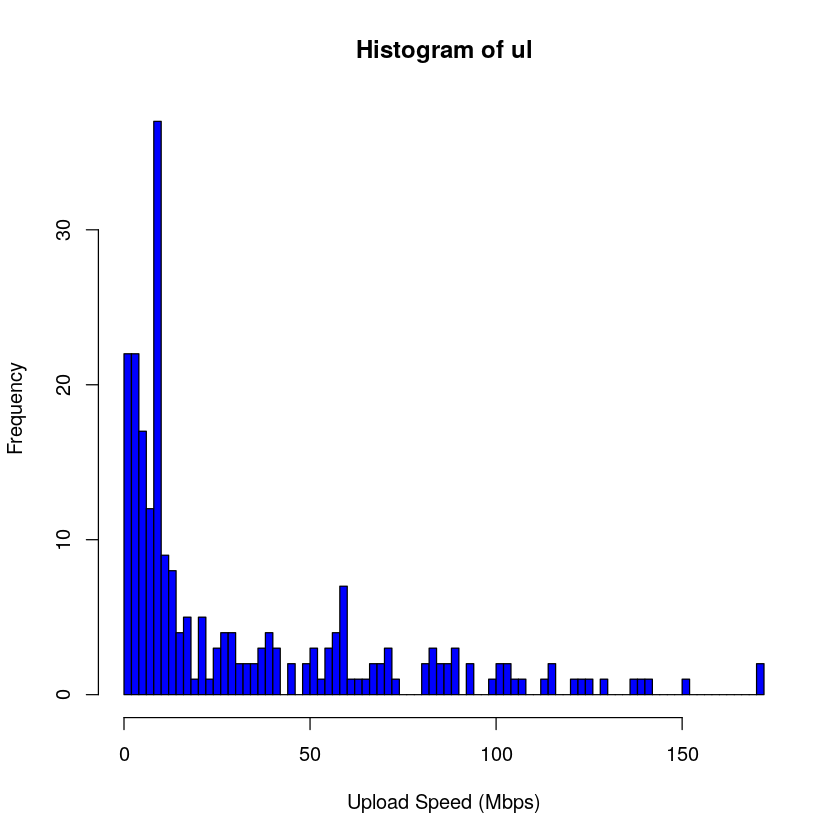

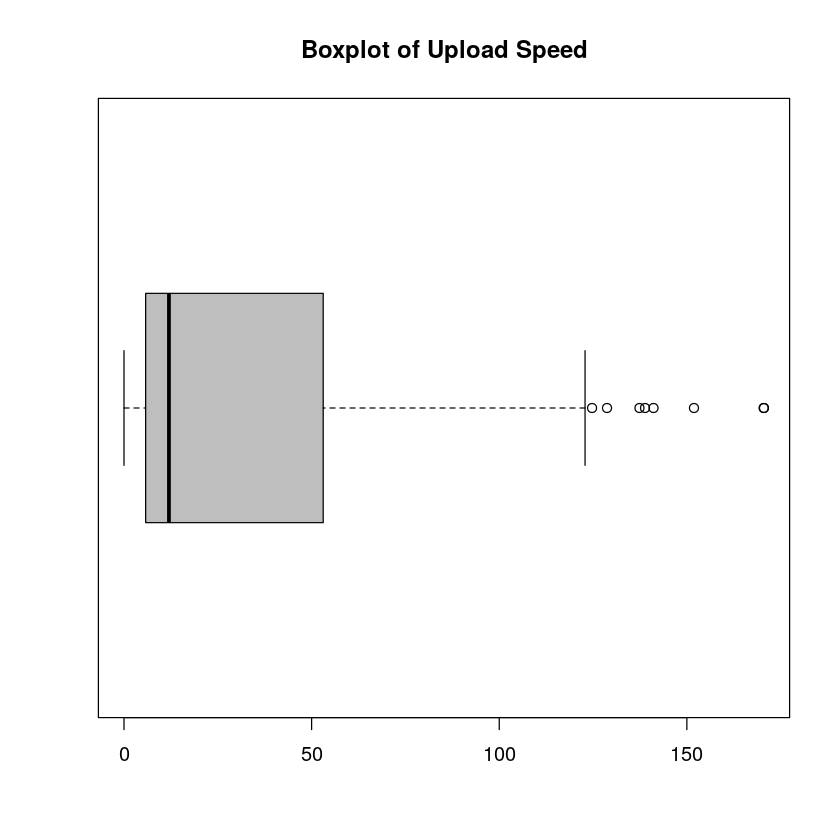

In [346]:
hist(ul, col="blue",breaks = 100, xlab = "Upload Speed (Mbps)")
boxplot(ul, horizontal = TRUE, col="grey", main="Boxplot of Upload Speed")

### Key observations

- The median upload speed of the observed sample is 11.98 (IQR=5.77-53.09) Mbps.
- A small fraction of responders have access to high upload speed broadband.

## Comparitive Analysis: Download and Upload Speed

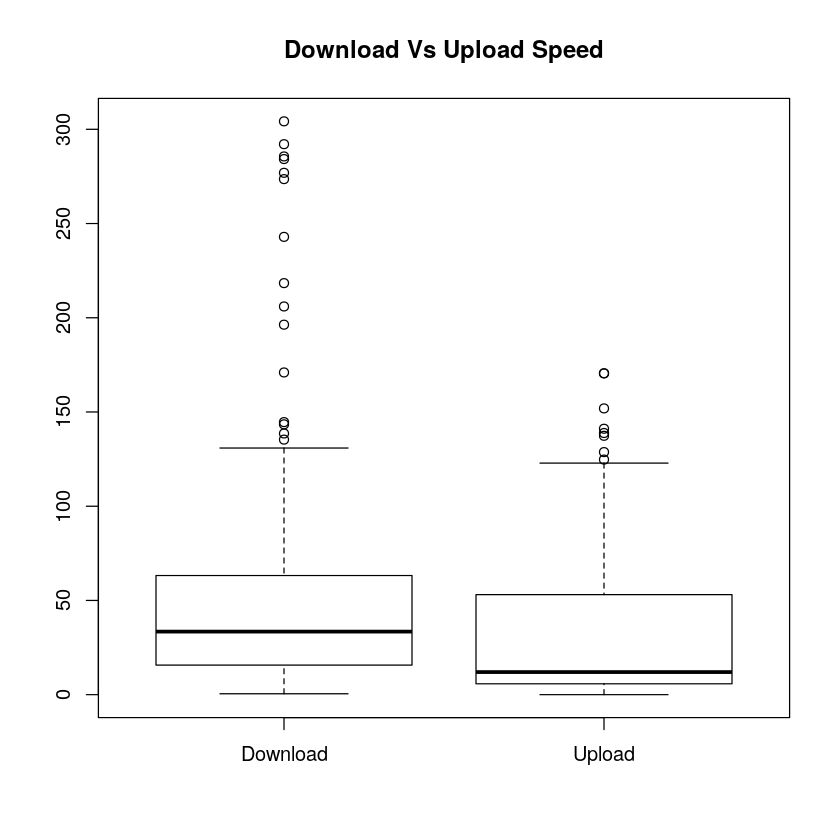

In [280]:
boxplot(dl, ul, main="Download Vs Upload Speed", names = c("Download", "Upload"))

### Key Observations

- It seems like responders receive higher download speeds as compared to upload speeds.
- It is observed that the overall spread of both download and upload speeds is nearly equivalent. IQR(Download) = 47.53 and IQR(Upload) = 47.32

# Download Speed Vs ISP

![title](isp_dl.png)

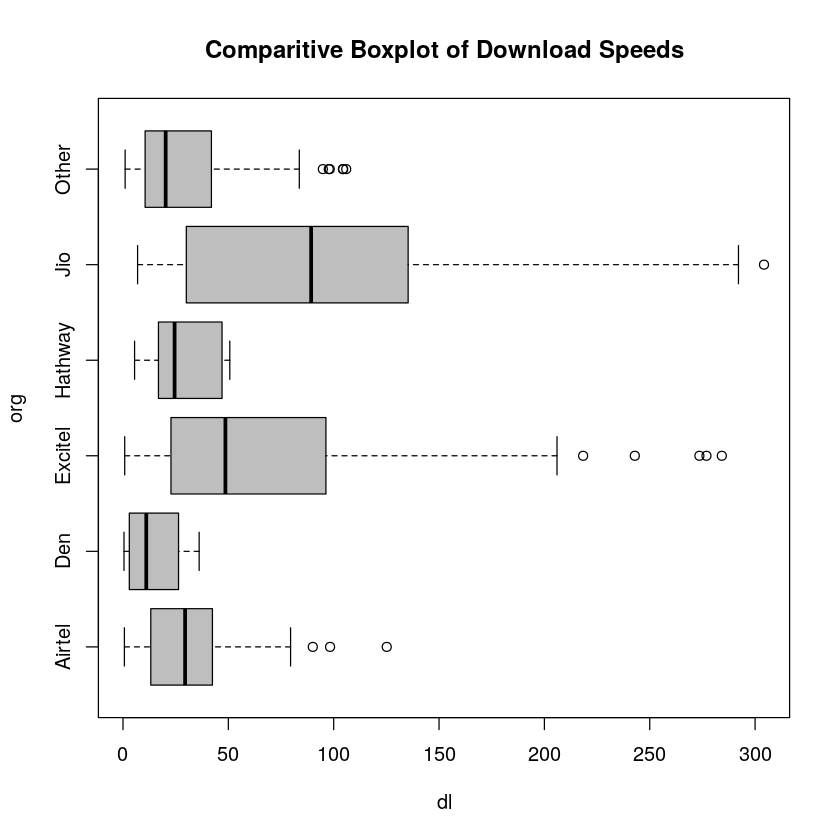

In [347]:
boxplot(dl ~ org, horizontal = TRUE, col="grey", main="Comparitive Boxplot of Download Speeds")

### Key Observations:

- Based on the visual inspection, it looks like Jio is the clear winner in terms of offering high download speeds to its subscribers. Excitel follows Jio by offering 48.03 Mbps (Median) to a large proportion of its customers.
- Den, Hathway and Others might be closely competing with Airtel, however let’s see we have sufficient evidence to support this claim.
- Although Jio and Excitel subscribers enjoy higher download bandwidths, their distributions are more scattered as compared to their competitors. This could be both good and bad depending on which of the following is True:

    - Jio and Excitel Subscribers have diverse choices of plans to choose from as compared to their competitors.
    - High degree of spread is an indicator of inconsistent performance which may lead to reduced customer satisfaction

![title](mad.png)

- The table above illustrates the IQR and Mean Absolute Deviations of download speeds offered by internet service providers. It is clear that a comparatively higher degree of variation is associated with Jio and Excitel download speeds, where as Airtel and Den are more. consistent

# Upload Speed Vs ISP

![title](upload_isp.png)

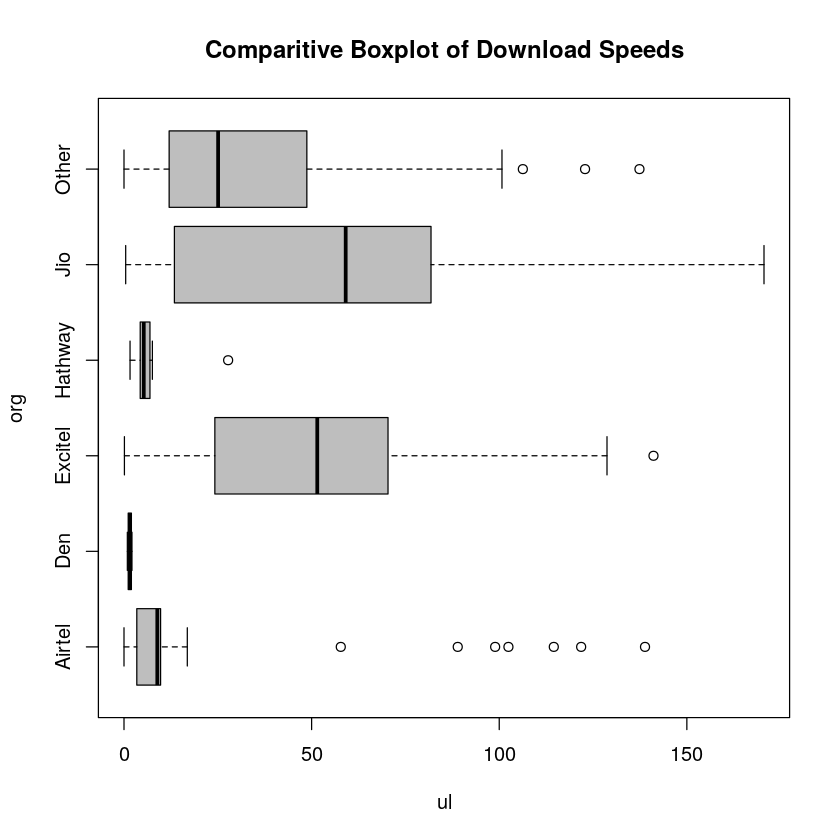

In [281]:
boxplot(ul ~ org, horizontal = TRUE, col="grey", main="Comparitive Boxplot of Download Speeds")

### Key Observations

- It seems like Excitel and Jio offer relatively higher upload speeds
- It looks like Airtel and others are capable of competing with Jio and Excitel's performance however only a small portion of responders in the sample have access to that bandwidth (Which are illustrated as outliers) (Is that because of high price?)

# Median Absolute Deviation - Upload Speed (Sample)

In [349]:
aggregate(ul, by=list(Category=org), FUN=mad)

Category,x
<fct>,<dbl>
Airtel,4.151280
Den,0.570801
Excitel,33.032328
Hathway,2.424051
Jio,66.198090
Other,21.416157


### Key Observations

- The case of upload speeds is not very different from variations observed in download speed. Upload speeds of Jio and Excitel are more spreaded aas compared to Airtel, Hathway and Den.

## Download Speed Vs Hour

![title](speed_hour.png)

## Upload Speed Vs Hour

![title](upload_speed_hour.png)

### Key Observations

- Download Speeds were at the peak during 6 AM in the morning and 1 PM in the afternoon (Why so?)
- Upload speeds were at peak during 4,6 and 16 hour.
- Further investigation may be required to understand the effect of hour of day on download and upload speed using suitable statistical techniques. 

## Association between Download and Upload Speed - Pearson's product-moment correlation

The correlation test is used to test whether the correlation (denoted ρ) between 2 variables is significantly different from 0 or not.

In [354]:
#H0: ρ=0
#H1: ρ≠0
cor.test(dl, ul)
cor.test(data[data$org=='Airtel',]$dl, data[data$org=='Airtel',]$ul)
cor.test(data[data$org=='Jio',]$dl, data[data$org=='Jio',]$ul)
cor.test(data[data$org=='Excitel',]$dl, data[data$org=='Excitel',]$ul)
cor.test(data[data$org=='Den',]$dl, data[data$org=='Den',]$ul)
cor.test(data[data$org=='Hathway',]$dl, data[data$org=='Hathway',]$ul)
cor.test(data[data$org=='Other',]$dl, data[data$org=='Other',]$ul)


	Pearson's product-moment correlation

data:  dl and ul
t = 14.369, df = 235, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6095772 0.7462783
sample estimates:
      cor 
0.6838843 



	Pearson's product-moment correlation

data:  data[data$org == "Airtel", ]$dl and data[data$org == "Airtel", ]$ul
t = 9.0008, df = 84, p-value = 5.911e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5740246 0.7945940
sample estimates:
      cor 
0.7006819 



	Pearson's product-moment correlation

data:  data[data$org == "Jio", ]$dl and data[data$org == "Jio", ]$ul
t = 9.4803, df = 23, p-value = 2.072e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7679616 0.9518467
sample estimates:
      cor 
0.8923216 



	Pearson's product-moment correlation

data:  data[data$org == "Excitel", ]$dl and data[data$org == "Excitel", ]$ul
t = 4.1702, df = 60, p-value = 9.945e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2543888 0.6471799
sample estimates:
      cor 
0.4740375 



	Pearson's product-moment correlation

data:  data[data$org == "Den", ]$dl and data[data$org == "Den", ]$ul
t = 0.93063, df = 2, p-value = 0.4503
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8721512  0.9885351
sample estimates:
      cor 
0.5497106 



	Pearson's product-moment correlation

data:  data[data$org == "Hathway", ]$dl and data[data$org == "Hathway", ]$ul
t = 0.74551, df = 12, p-value = 0.4703
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3604210  0.6665634
sample estimates:
      cor 
0.2103923 



	Pearson's product-moment correlation

data:  data[data$org == "Other", ]$dl and data[data$org == "Other", ]$ul
t = 8.6037, df = 44, p-value = 5.575e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6514214 0.8799503
sample estimates:
      cor 
0.7919556 


### Key Observations

- The result of above correlation tests are as follows:

- The p-value of the correlation test between download and upload speed of airtel broadband connection is 2.2e-16. At the 5% significance level, we reject the null hypothesis of no correlation. We therefore conclude that there exists a relationship between the two variables.

- In fact, except Den and Hathway, for other ISPs a higher download speed also gurantees higher upload speed.
- However going by the result of first test,it may be concluded in general higher download speed also promises higher upload speed.

# Inferential Statistics

## Objectives:

1. What is the average download and upload speed expereinced by users in Delhi?
2. How does performance of ISPs deviates from advertised speeds?
3. To identify if there is any significant differenece between performances of various ISPs (as percieved by users)
4. What is the estimated propotion of users of each ISP in the population?
5. What is the contribution of hour of the day to the variation observed in download and upload speeds?

### Preliminary Investigation

##### Normality Test
A normality test is used to determine whether sample data has been drawn from a normally distributed population (within some tolerance). A number of statistical tests, such as the Student's t-test and the one-way and two-way ANOVA require a normally distributed sample population. If the assumption of normality is not valid, the results of the tests will be unreliable. We should perform some preleminary tests to make sure that the test assumptions are met. In the situations where the assumptions are violated, non-paramatric tests are recommended.

If the sample size is large enough (n > 30), we can ignore the distribution of the data and use parametric tests.

However, from the summary statistics results we know that our sample size is not large enough for 
a. Hathway
b. Jio
c. Den

So a normality test is required to be performed. 

### Q-Q Plot

[1] 43 30

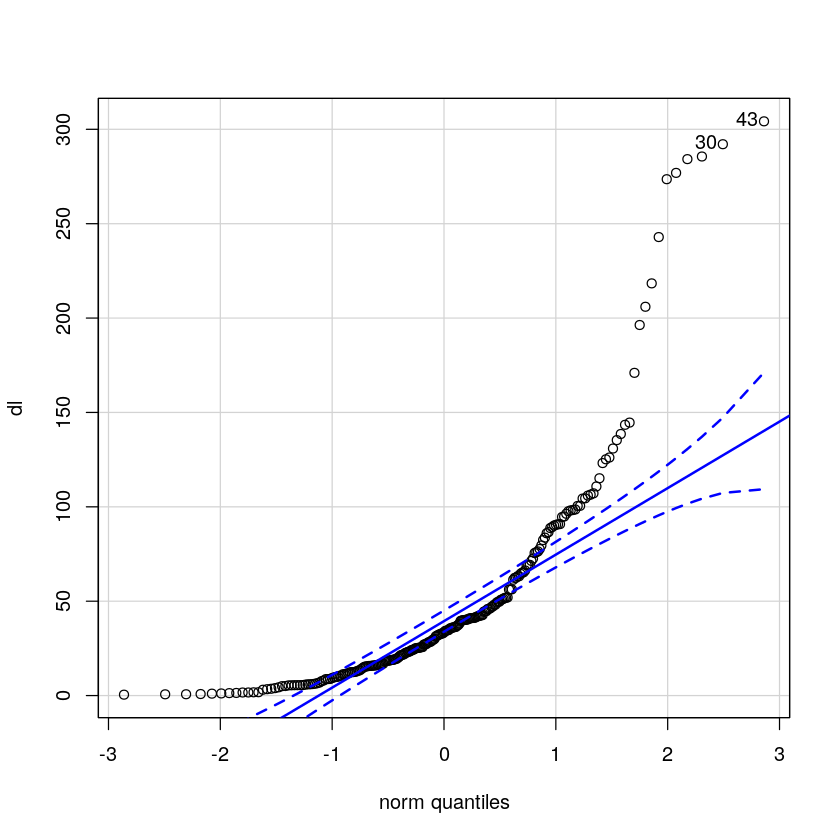

In [355]:
qqPlot(dl)

### Key Observation
- Preliminary visual inspection suggests that download speeds in general do not follow guassian distribution. 
- Data points in the range of higher bandwidths deviates from normal in some cases (See Q-Q plots below)

[1] 16 18

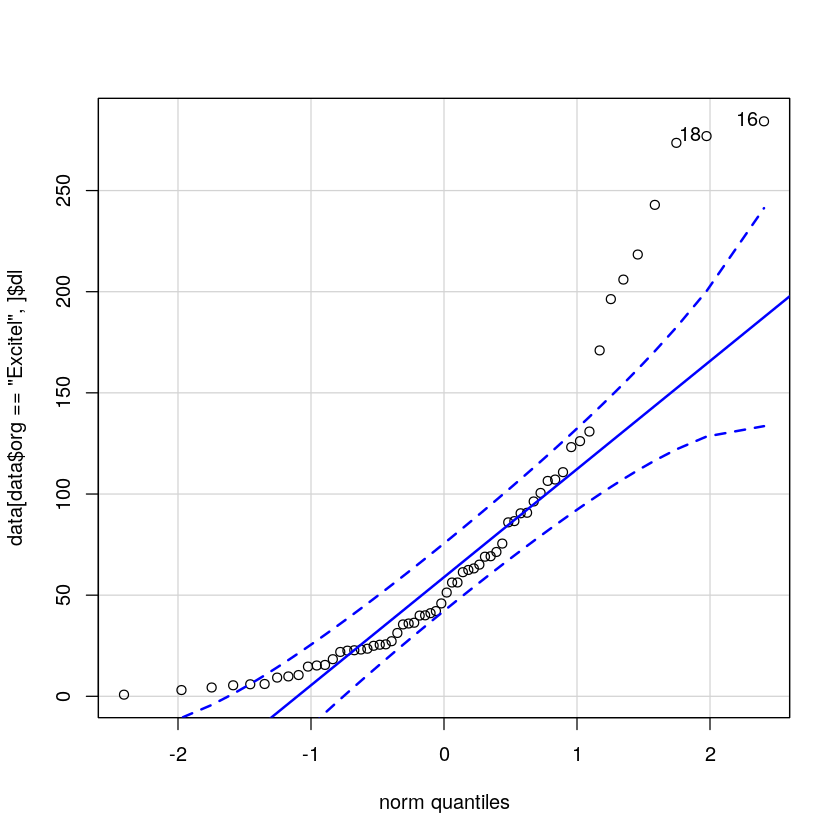

[1] 79 77

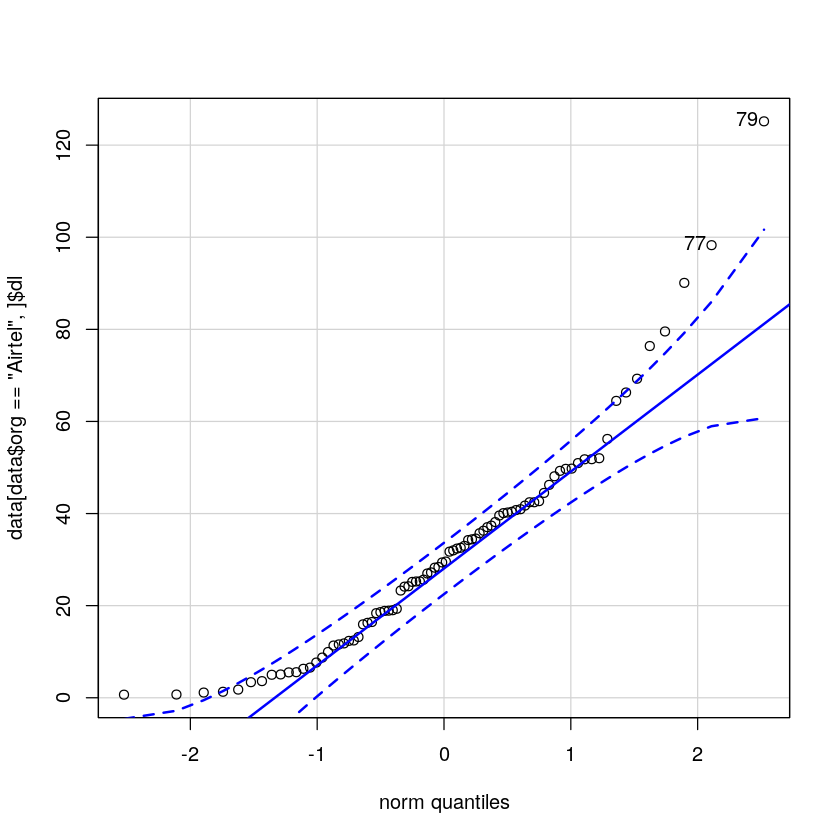

[1] 21 34

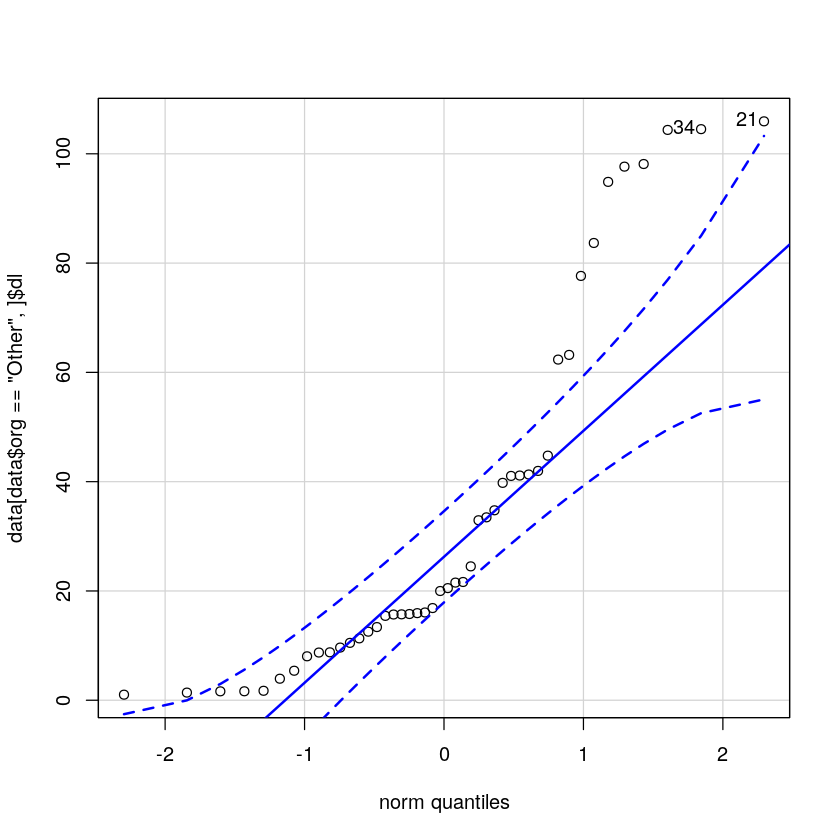

In [286]:
qqPlot(data[data$org=='Excitel',]$dl)
qqPlot(data[data$org=='Airtel',]$dl)
qqPlot(data[data$org=='Other',]$dl)

## Shapiro-Wilk’s test for Normality

In [287]:
#Download Speeds
shapiro.test(data[data$org=='Jio',]$dl)
shapiro.test(data[data$org=='Hathway',]$dl)
shapiro.test(data[data$org=='Den',]$dl)

#Upload Speeds
shapiro.test(data[data$org=='Jio',]$ul)
shapiro.test(data[data$org=='Hathway',]$ul)
shapiro.test(data[data$org=='Den',]$ul)


	Shapiro-Wilk normality test

data:  data[data$org == "Jio", ]$dl
W = 0.83795, p-value = 0.001049



	Shapiro-Wilk normality test

data:  data[data$org == "Hathway", ]$dl
W = 0.85045, p-value = 0.02253



	Shapiro-Wilk normality test

data:  data[data$org == "Den", ]$dl
W = 0.92593, p-value = 0.5707



	Shapiro-Wilk normality test

data:  data[data$org == "Jio", ]$ul
W = 0.8765, p-value = 0.005856



	Shapiro-Wilk normality test

data:  data[data$org == "Hathway", ]$ul
W = 0.55893, p-value = 1.787e-05



	Shapiro-Wilk normality test

data:  data[data$org == "Den", ]$ul
W = 0.97661, p-value = 0.8819


### Test Interetation

From the output, the p-value > 0.05 for Den implying that the distribution of the data are not significantly different from normal distribution. In other words, we can assume the normality. However for Jio and Hathway speed measurements, normality cannot be assumed.

# One Sample Student's T-Test for Airtel, Excitel and Others

## Airtel


##### Airtel broadband subscribers feel average download speed of their connection is less than 40 Mbps

- HA: mu < 40
- H0: mu = 40

In [288]:
t.test(data[data$org=='Airtel',]$dl, mu=40, alternative="less", conf.level=0.95)


	One Sample t-test

data:  data[data$org == "Airtel", ]$dl
t = -3.2972, df = 85, p-value = 0.0007132
alternative hypothesis: true mean is less than 40
95 percent confidence interval:
    -Inf 35.9111
sample estimates:
mean of x 
 31.75035 


### Test Result:

The one-sided 95% confidence interval tells us that mean download speed is likely to be less than 35.911 Mbps
The p-value of 0.000713 indicates strong evidence against the null hypothesis, as there is 0.071% chance that null is correct.

## Excitel


##### Excitel broadband subscribers feel average download speed of their connection is less than 100 Mbps

- HA: mu < 100
- H0: mu = 100

In [358]:
t.test(data[data$org=='Excitel',]$dl, mu=100, alternative="less", conf.level=0.95)


	One Sample t-test

data:  data[data$org == "Excitel", ]$dl
t = -2.9594, df = 61, p-value = 0.002192
alternative hypothesis: true mean is less than 100
95 percent confidence interval:
    -Inf 88.1297
sample estimates:
mean of x 
 72.75097 


### Test Result:
Since the p value is less than the significance level alpha (0.05), null hypothesis is rejected in the favour
of alternative hypothesis. Confidence interval tells us that download speed is likely to be less than 88.129 Mbps.

## Others


##### Other broadband subscribers feel average download speed of their connection is less than 40 Mbps

- HA: mu < 40
- H0: mu = 40

In [290]:
t.test(data[data$org=='Other',]$dl, mu=40, alternative="less", conf.level=0.95)


	One Sample t-test

data:  data[data$org == "Other", ]$dl
t = -1.252, df = 45, p-value = 0.1085
alternative hypothesis: true mean is less than 40
95 percent confidence interval:
     -Inf 42.05677
sample estimates:
mean of x 
 33.97543 


### Test Result:

Since the p-value is not less than the significance level of 0.05, we cannot reject the null hypothesis that the downlaod speed is equal to 40Mbps. This means that there is no evidence that the download speed is less than 40 Mbps.

# Wilcoxon Signed-Rank Test - Jio, Den and Hathway

# Jio


##### Jio broadband subscribers feel average download speed of their connection is less than 100 Mbps

- HA: mu < 100
- H0: mu = 100

In [361]:
wilcox.test(data[data$org=='Jio',]$dl, mu = 100,
              alternative = "less", conf.level = 0.95,conf.int = T)


	Wilcoxon signed rank test

data:  data[data$org == "Jio", ]$dl
V = 134, p-value = 0.2289
alternative hypothesis: true location is less than 100
95 percent confidence interval:
   -Inf 116.59
sample estimates:
(pseudo)median 
         87.34 


### Test Result:

Since the p-value is not less than the significance level of 0.05, we cannot reject the null hypothesis that the downlaod speed is equal to 100 Mbps. This means that there is no evidence that the download speed is less than 100 Mbps.

# Den


##### Den broadband subscribers feel average download speed of their connection is less than 40 Mbps

- HA: mu < 40
- H0: mu = 40

In [362]:
wilcox.test(data[data$org=='Den',]$dl, mu = 40,
              alternative = "less", conf.level = 0.95,conf.int = T)


	Wilcoxon signed rank test

data:  data[data$org == "Den", ]$dl
V = 0, p-value = 0.0625
alternative hypothesis: true location is less than 40
95 percent confidence interval:
  -Inf 36.15
sample estimates:
(pseudo)median 
        13.815 


### Test Result:


Since the p-value is not less than the significance level of 0.05, we cannot reject the null hypothesis that the downlaod speed is equal to 40 Mbps. This means that there is no evidence that the download speed is less than 40 Mbps.

# Hathway


##### Hathway broadband subscribers feel average download speed of their connection is less than 40 Mbps

- HA: mu < 40
- H0: mu = 40

In [363]:
wilcox.test(data[data$org=='Hathway',]$dl, mu = 40,
              alternative = "less", conf.level = 0.95,conf.int = T)


	Wilcoxon signed rank test

data:  data[data$org == "Hathway", ]$dl
V = 21, p-value = 0.02472
alternative hypothesis: true location is less than 40
95 percent confidence interval:
   -Inf 36.825
sample estimates:
(pseudo)median 
        28.245 


### Test Result:

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis in the favour of alternative hypothesis and thuse conclude that hathway broadband subscribers feel average download speed is less than 40 Mbps

###  Summary of Hypothesis Tests - Download Speeds

![title](donwload_conf.png)

# Upload Speed Analysis

# Preliminary Investigation

In [295]:
summary(ul) # 5 number summary
sd(ul) # Sample Standard Deviation
var(ul) #Sample Variance

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.77   11.98   32.04   53.09  170.56 

[1] 37.58529

[1] 1412.654

## Airtel

##### Airtel broadband subscribers feel average upload speed of their connection is less than 20 Mbps

- HA: mu < 20
- H0: mu = 20

In [372]:
t.test(data[data$org=='Airtel',]$ul, mu=20, alternative="less", conf.level=0.95)


	One Sample t-test

data:  data[data$org == "Airtel", ]$ul
t = -1.8322, df = 85, p-value = 0.03521
alternative hypothesis: true mean is less than 20
95 percent confidence interval:
     -Inf 19.49457
sample estimates:
mean of x 
 14.52814 


### Test Result:

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis in the favour of alternative hypothesis and thuse conclude that Airtel broadband subscribers feel average upload speed is less than 20 Mbps

## Excitel


##### Excitel broadband subscribers feel average upload speed of their connection is less than 40 Mbps

- HA: mu < 40
- H0: mu = 40

In [392]:
t.test(data[data$org=='Excitel',]$ul, mu=40, alternative="less", conf.level=0.95)


	One Sample t-test

data:  data[data$org == "Excitel", ]$ul
t = 2.4747, df = 61, p-value = 0.9919
alternative hypothesis: true mean is less than 40
95 percent confidence interval:
     -Inf 58.09592
sample estimates:
mean of x 
 50.80403 


### Test Result:

Since the p-value is greater than the significance level of 0.05, we cannot reject the null hypothesis. Therefore there is no evidence to support that upload speed is less than 40 Mbps.

## Others


##### Other broadband subscribers feel average upload speed of their connection is less than 40 Mbps

- HA: mu < 40
- H0: mu = 40

In [393]:
t.test(data[data$org=='Other',]$ul, mu=40, alternative="less", conf.level=0.95)


	One Sample t-test

data:  data[data$org == "Other", ]$ul
t = -0.73134, df = 45, p-value = 0.2342
alternative hypothesis: true mean is less than 40
95 percent confidence interval:
     -Inf 44.77144
sample estimates:
mean of x 
 36.31935 


### Test Result:

Since the p-value is greater than the significance level of 0.05, we cannot reject the null hypothesis. Therefore there is no evidence to support that upload speed is less than 40 Mbps.

# Wilcoxon Signed-Rank Test for Upload Speeds received by Jio, Den and Hathway users

# Jio


##### Jio broadband subscribers feel average upload speed of their connection is less than 80 Mbps

- HA: mu < 80
- H0: mu = 80

In [382]:
wilcox.test(data[data$org=='Jio',]$ul, mu = 80,
              alternative = "less", conf.level = 0.95,conf.int = T)


	Wilcoxon signed rank test

data:  data[data$org == "Jio", ]$ul
V = 91, p-value = 0.02754
alternative hypothesis: true location is less than 80
95 percent confidence interval:
 -Inf 75.5
sample estimates:
(pseudo)median 
         49.33 


### Test Result:

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis in the favour of alternative hypothesis and thuse conclude that Jio broadband subscribers feel average upload speed is less than 80 Mbps

# Den


##### Den broadband subscribers feel average upload speed of their connection is less than 2 Mbps

- HA: mu < 2
- H0: mu = 2

In [389]:
wilcox.test(data[data$org=='Den',]$ul, mu = 2,
              alternative = "less", conf.level = 0.95,conf.int = T)


	Wilcoxon signed rank test

data:  data[data$org == "Den", ]$ul
V = 1, p-value = 0.125
alternative hypothesis: true location is less than 2
95 percent confidence interval:
 -Inf 2.12
sample estimates:
(pseudo)median 
         1.545 


### Test Result:

Since the p-value is greater than the significance level of 0.05, we cannot reject the null hypothesis. Therefore there is no evidence to support that upload speed is less than 2 Mbps.

# Hathway


##### Hathway broadband subscribers feel average upload speed of their connection is less than 20 Mbps

- HA: mu < 20
- H0: mu = 20

In [391]:
wilcox.test(data[data$org=='Hathway',]$ul, mu = 10,
              alternative = "less", conf.level = 0.95,conf.int = T)


	Wilcoxon signed rank test with continuity correction

data:  data[data$org == "Hathway", ]$ul
V = 14, p-value = 0.008514
alternative hypothesis: true location is less than 10
95 percent confidence interval:
     -Inf 6.909948
sample estimates:
(pseudo)median 
      5.619953 


### Test Result:

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis in the favour of alternative hypothesis and thuse conclude that Hathway broadband subscribers feel average upload speed is less than 10 Mbps

###  Summary of Hypothesis Tests - Upload Speeds

![title](upload_test.png)

## Test for Assumptions of ANOVA

### Bartlett test of homogeneity of variances

In [394]:
# H0: Variance is same for all treatment groups
# HA: Variance is not same

bartlett.test(dl ~ org)


	Bartlett test of homogeneity of variances

data:  dl by org
Bartlett's K-squared = 132.96, df = 5, p-value < 2.2e-16


##### Test Result 

From the output we can see that the p-value of 2.2e-16 is less than the significance level of 0.05. This means we must reject the null hypothesis that the variance is the same for all treatment groups in favour of the alternative.  That means assumption of equal variances between treatments does not hold, and hence anova cannot be performed.

# Kruskal-Wallis test 


Kruskal-Wallis test by rank is a non-parametric alternative to one-way ANOVA test, which extends the two-samples Wilcoxon test in the situation where there are more than two groups. It’s recommended when the assumptions of one-way ANOVA test are not met.

In [306]:
kruskal.test(dl ~ org, data = data)
kruskal.test(ul ~ org, data = data)


	Kruskal-Wallis rank sum test

data:  dl by org
Kruskal-Wallis chi-squared = 34.693, df = 5, p-value = 1.733e-06



	Kruskal-Wallis rank sum test

data:  ul by org
Kruskal-Wallis chi-squared = 83.576, df = 5, p-value < 2.2e-16


#### Test Interpretation:

As the p-value is less than the significance level 0.05, we can conclude that there are significant differences between the download and upload speeds

## Multiple pairwise-comparison between ISPs

In [307]:
pairwise.wilcox.test(dl, org,
                 p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  dl and org 

        Airtel  Den     Excitel Hathway Jio    
Den     0.13920 -       -       -       -      
Excitel 0.00226 0.05158 -       -       -      
Hathway 0.98811 0.13920 0.05158 -       -      
Jio     0.00014 0.02547 0.09183 0.00327 -      
Other   0.59008 0.30157 0.00343 0.65353 0.00063

P value adjustment method: BH 

The pairwise comparison shows that following pairs of ISPs are significantly differenet in terms
of download speeds:


- Airtel and Excitel
- Airtel and Jio
- Jio and Den
- Jio and Hathway
- Excitel and Others
- Jio and Others


And following are similar:

- Airtel and Den
- Excitel and Den
- Airtel and Hathway
- Hathway and Den
- Hathway and Excitel
- Airtel and Others
- Den and Others
- Excitel and Jio
- Hathway and Others


In [396]:
pairwise.wilcox.test(ul, org,
                 p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  ul and org 

        Airtel  Den     Excitel Hathway Jio    
Den     0.01327 -       -       -       -      
Excitel 1.0e-11 0.00248 -       -       -      
Hathway 0.15268 0.01011 1.5e-05 -       -      
Jio     5.5e-05 0.00533 0.99626 0.00145 -      
Other   9.4e-08 0.00175 0.01271 0.00028 0.23514

P value adjustment method: BH 

In terms of upload speed, speeds are felt similar among following pairs of broadbands:

- Airtel and Hathway
- Jio and Excitel
- Jio and Others

# ISP Preferences Analysis

Following frequency table depicts the ISP preferences of responders who volunteered to share the speed test results. We wish to test the null hypothesis that all 6 ISPs are equally preferred, or equivalently 1/6 of the responders preferred each ISP

In [341]:
x=data %>%count(data$ip, data$org)
count(x, x$`data$org`)

x$`data$org`,n
<fct>,<int>
Airtel,38
Den,4
Excitel,29
Hathway,6
Jio,15
Other,30


## Chi-squared test

In [343]:
# All ISPs
obsfreq <- c(38,4,29,6,15,30)
nullprobs <- c(1/6,1/6,1/6,1/6,1/6,1/6)
chisq.test(obsfreq,p=nullprobs)


	Chi-squared test for given probabilities

data:  obsfreq
X-squared = 48.262, df = 5, p-value = 3.14e-09


In [342]:
# Airtel, Excitel and Other
obsfreq <- c(38,29,30)
nullprobs <- c(1/3,1/3,1/3)
chisq.test(obsfreq,p=nullprobs)


	Chi-squared test for given probabilities

data:  obsfreq
X-squared = 1.5052, df = 2, p-value = 0.4712


#### Chi Square Test Results:

- All ISPs are NOT equally liked by the population
- Airtel, Excitel and Other local ISPs are equally preferred.

## Hour of Day and Broadband Performance

In [395]:
pairwise.wilcox.test(dl, hour,
                 p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  dl and hour 

   0     2     4     5     6     7     8     9     10    11    12    13   
2  0.999 -     -     -     -     -     -     -     -     -     -     -    
4  0.938 1.000 -     -     -     -     -     -     -     -     -     -    
5  0.938 1.000 0.997 -     -     -     -     -     -     -     -     -    
6  0.763 0.968 0.673 0.763 -     -     -     -     -     -     -     -    
7  0.787 0.969 0.938 0.969 0.691 -     -     -     -     -     -     -    
8  0.950 1.000 0.947 0.969 0.673 0.763 -     -     -     -     -     -    
9  0.763 1.000 0.923 0.923 0.763 1.000 0.763 -     -     -     -     -    
10 0.923 0.974 0.950 0.923 0.763 1.000 0.787 0.969 -     -     -     -    
11 0.974 0.950 0.974 1.000 0.691 0.969 1.000 0.923 0.923 -     -     -    
12 0.974 0.938 0.969 0.997 0.763 0.923 0.999 0.923 0.944 1.000 -     -    
13 0.923 0.944 0.874 0.950 0.360 0.691 0.969 0.691 0.691 1.000 0.999 -    
14 1.000 0.763 0.350 0.76

### Test Result

- Broadband performance is indpendent of the hour of day for any given day.

## Up Next

- Predictive Model
- Executive Summary and Conclusion